C:\Users\bkaya\AppData\Local\Temp\ipykernel_4068\2732077841.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data, labels=sorted(data['current'].unique()))
C:\Users\bkaya\AppData\Local\Temp\ipykernel_4068\2732077841.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data, labels=sorted(data['current'].unique()))
C:\Users\bkaya\AppData\Local\Temp\ipykernel_4068\2732077841.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data, labels=sorted(data['current'].unique()))


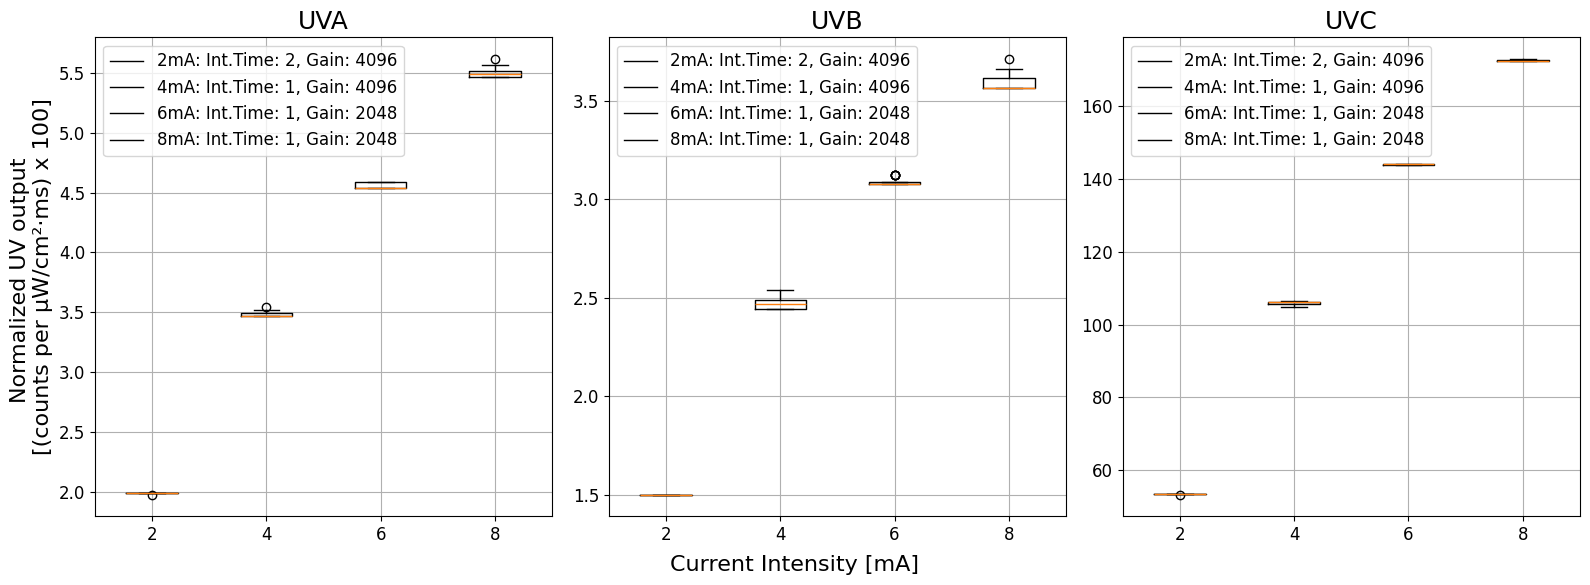

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv(r'sensor_algorithm.csv')

# Create plots
fig, axs = plt.subplots(1, 3, figsize=(16, 6))  

# Define font sizes
label_fontsize = 16   
title_fontsize = 18   
legend_fontsize = 12 
tick_fontsize = 12   

# Plot the data
for ax, uv_type in zip(axs, ['UVA', 'UVB', 'UVC']):
    # Prepare data for boxplot
    box_data = [100 * data[data['current'] == current_value][uv_type] / 
                (data[data['current'] == current_value]['integration time'] * data[data['current'] == current_value]['gain']) 
                for current_value in sorted(data['current'].unique())]
    ax.boxplot(box_data, labels=sorted(data['current'].unique()))
    
    # Only label the Y-axis for the first plot
    if ax == axs[0]:
        ax.set_ylabel('Normalized UV output \n[(counts per μW/cm²·ms) x 100]', fontsize=label_fontsize)
    
    # Set title for each plot
    ax.set_title(uv_type, fontsize=title_fontsize)
    ax.grid(True)
    
    # Adjust font size for tick labels
    ax.tick_params(axis='both', labelsize=tick_fontsize)
   
    # Add legend with Integration Time and Gain
    legend_text = []
    for current_value in sorted(data['current'].unique()):
        current_data = data[data['current'] == current_value].iloc[0]  # Take only the first dataset for each current value
        legend_text.append(f'{current_value}mA: Int.Time: {current_data["integration time"]}, Gain: {current_data["gain"]}')

    # Add legend with adjusted font size and position
    ax.legend(legend_text, loc='upper left', fontsize=legend_fontsize)

fig.text(0.5, 0.04, 'Current Intensity [mA]', ha='center', fontsize=label_fontsize)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout(rect=[0, 0.06, 1, 1])  
plt.show()
